# R Visual Insights

In [ ]:
library(dplyr)
library(ggplot2)

baby2006 <- read.table("/anvil/projects/tdm/data/ssa/yob2006.txt", sep = ",", header = FALSE)
colnames(baby2006) <- c("Name", "Sex", "Counts")

baby1997 <- read.table("/anvil/projects/tdm/data/ssa/yob1997.txt", sep = ",", header = FALSE)
colnames(baby1997) <- c("Name", "Sex", "Counts")

subset_2006 <- baby2006 %>% filter(Name %in% c("Alan", "Eric", "Avery"))
subset_1997 <- baby1997 %>% filter(Name %in% c("Alan", "Eric", "Avery"))

subset_2006
subset_1997

Name,Sex,Counts
<chr>,<chr>,<int>
Avery,F,5254
Eric,F,11
Alan,F,6
Eric,M,6231
Alan,M,3475
Avery,M,1794


Name,Sex,Counts
<chr>,<chr>,<int>
Avery,F,937
Eric,F,37
Alan,F,7
Eric,M,10317
Alan,M,2177
Avery,M,1173


I saw that Alan decreased in popularity, Eric remained around the same, and Avery increased by a large amount by 2006 compared to 1997. I did this by filtering each dataset to only those 3 names, then comparing their counts across the years.

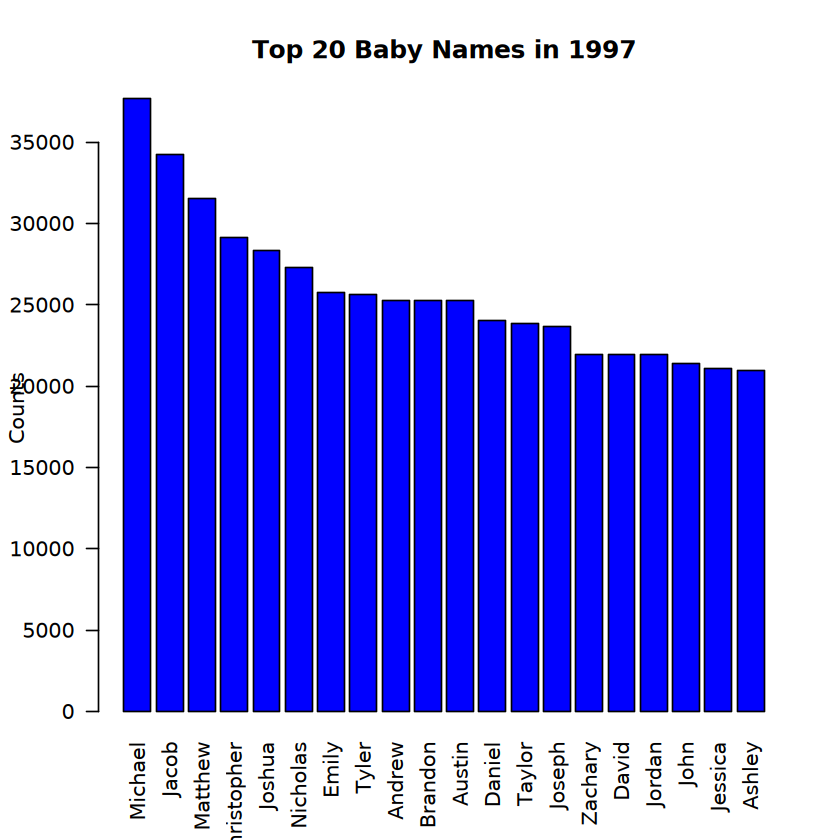

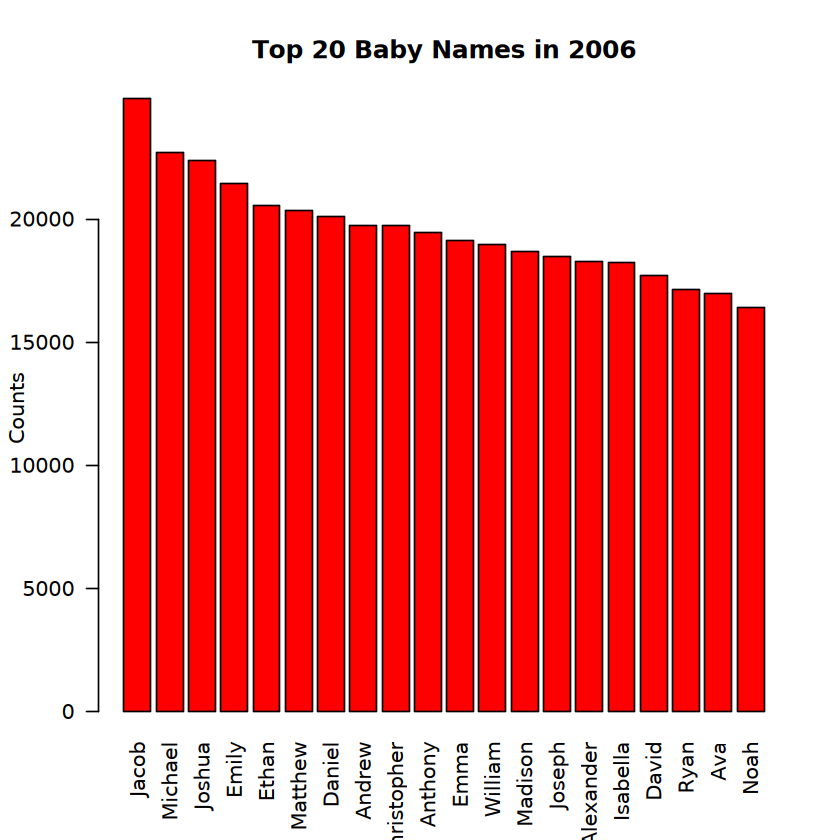

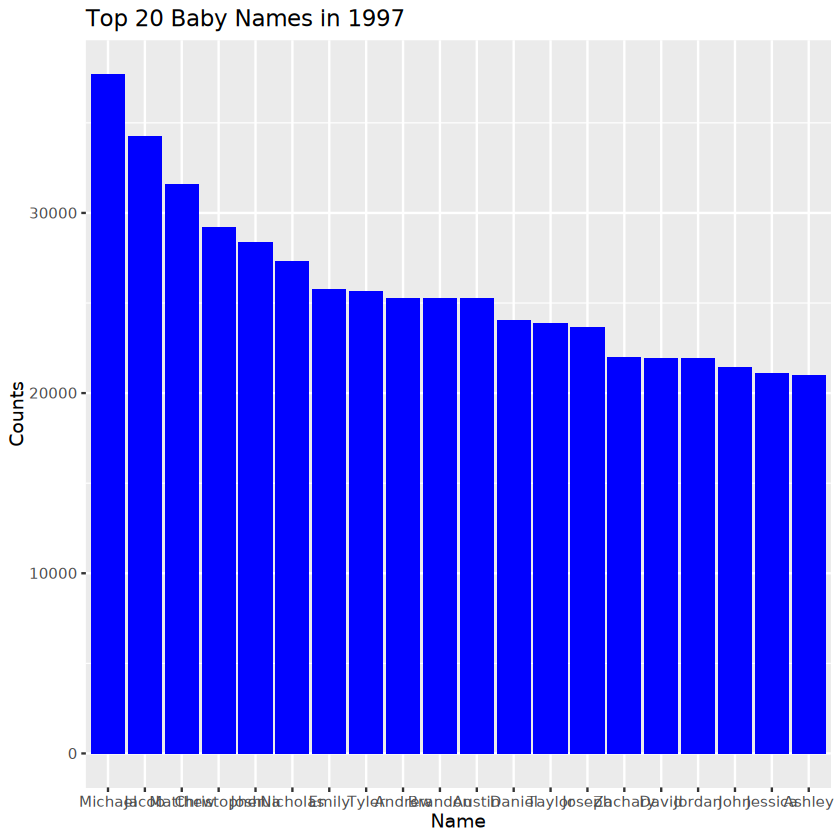

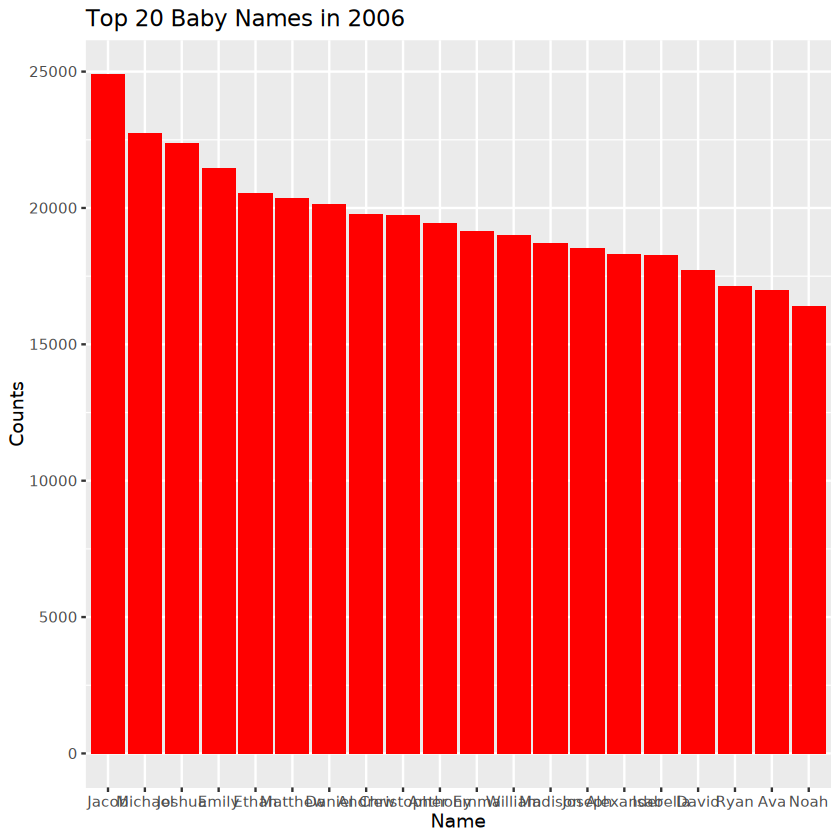

In [ ]:
top1997 <- baby1997 %>%
  group_by(Name) %>%
  summarise(Total = sum(Counts)) %>%
  arrange(desc(Total)) %>%
  slice_head(n = 20)

barplot(top1997$Total, names.arg = top1997$Name, las=2, col="blue", main="Top 20 Baby Names in 1997", ylab="Counts")

top2006 <- baby2006 %>%
  group_by(Name) %>%
  summarise(Total = sum(Counts)) %>%
  arrange(desc(Total)) %>%
  slice_head(n = 20)

barplot(top2006$Total, names.arg = top2006$Name, las=2, col="red", main="Top 20 Baby Names in 2006", ylab="Counts")

ggplot(top1997, aes(x = reorder(Name, -Total), y = Total)) +
  geom_col(fill = "blue") +
  ggtitle("Top 20 Baby Names in 1997") +
  xlab("Name") +
  ylab("Counts")

ggplot(top2006, aes(x = reorder(Name, -Total), y = Total)) +
  geom_col(fill = "red") +
  ggtitle("Top 20 Baby Names in 2006") +
  xlab("Name") +
  ylab("Counts")

First, I grouped the data by name, got the sum of the counts for each, then selected the top 20 for each year. For base R, I used barplot() with color and rotated the x-axis labels to enhance readability. In ggplot2, I mapped the names to the x-axis and counts to the y-axis. I then added a color to the graph and used geom_col(), then added labels to each axis.

To begin working with ggplot2, I specified the dataset and used aes() to map the x and y variables. Then, I added geom_col() to make the barplot, which has the counts from the dataset as the height of each bar. I then added a title and axis labels as was needed, also applying a color to the bars to allow for visual clarity.

In [ ]:
first_letter_counts <- baby2006 %>%
  mutate(first_letter = substr(Name, 1, 1)) %>%
  group_by(first_letter) %>%
  summarise(total_count = sum(Counts))

I made a new dataframe by using mutate() with substr() to create a new column containing only the first letters for each name. Then, I grouped the data by first_letter and used summarise to get the total number with names starting with each letter.

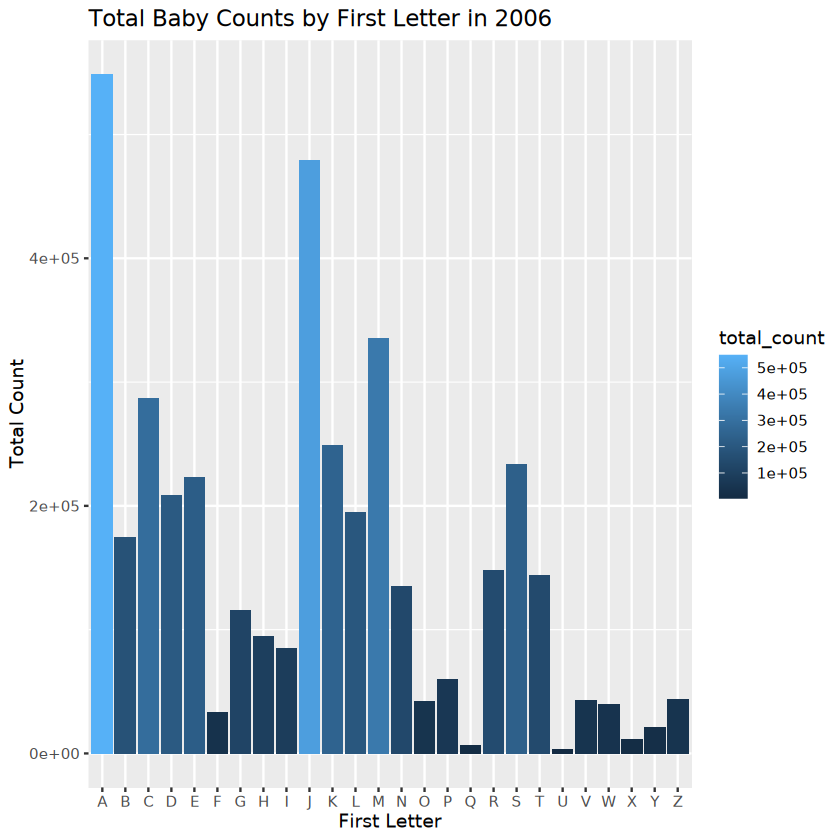

In [ ]:
ggplot(first_letter_counts, aes(x = first_letter, y = total_count, fill = total_count)) +
  geom_col() +
  labs(title = "Total Baby Counts by First Letter in 2006", x = "First Letter", y = "Total Count")

I used geom_col() because the heights correspond to the values in total_count. I used this over geom_bar(), because bar counts number of rows per category. col allowed me could plot the counts for each starting letter, and it gave a gradient to emphasize popularity differences.

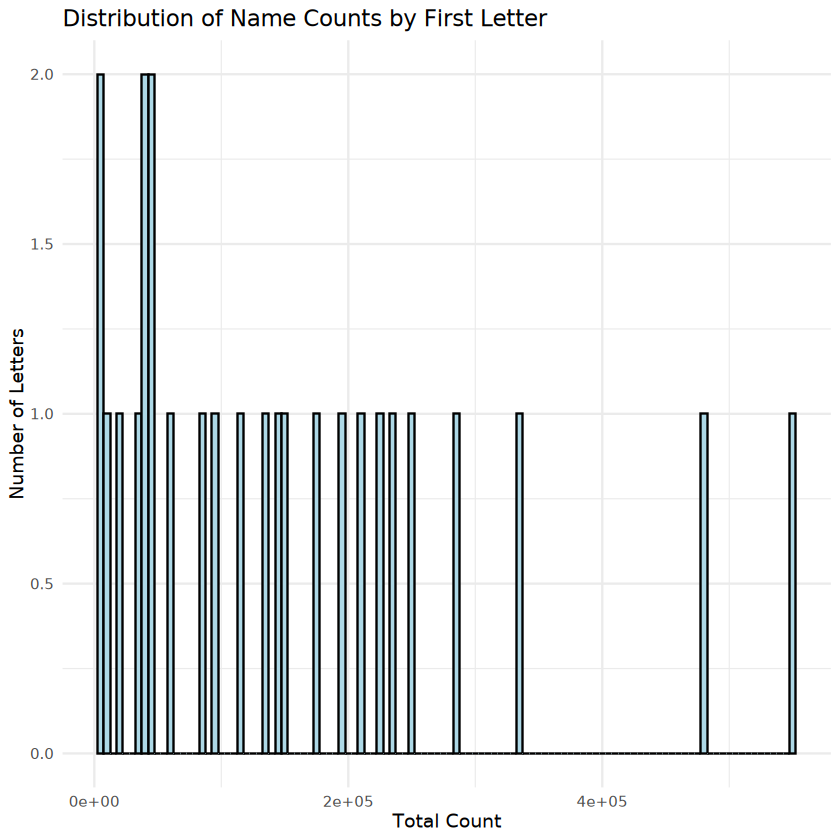

In [ ]:
ggplot(first_letter_counts, aes(x = total_count)) +
  geom_histogram(binwidth = 5000, fill="lightblue", color="black") +
  labs(title = "Distribution of Name Counts by First Letter", x = "Total Count", y = "Number of Letters") +
  theme_minimal()

The histogram shows how total counts are distributed across each letter, but it is not good for this dataset because each letter only appears once. While the x-axis represents total counts, the y-axis shows how many letters are in each range, which does not convey the identity of each letter. I believe a histogram would be more useful for larger numeric datasets where many observations share values.

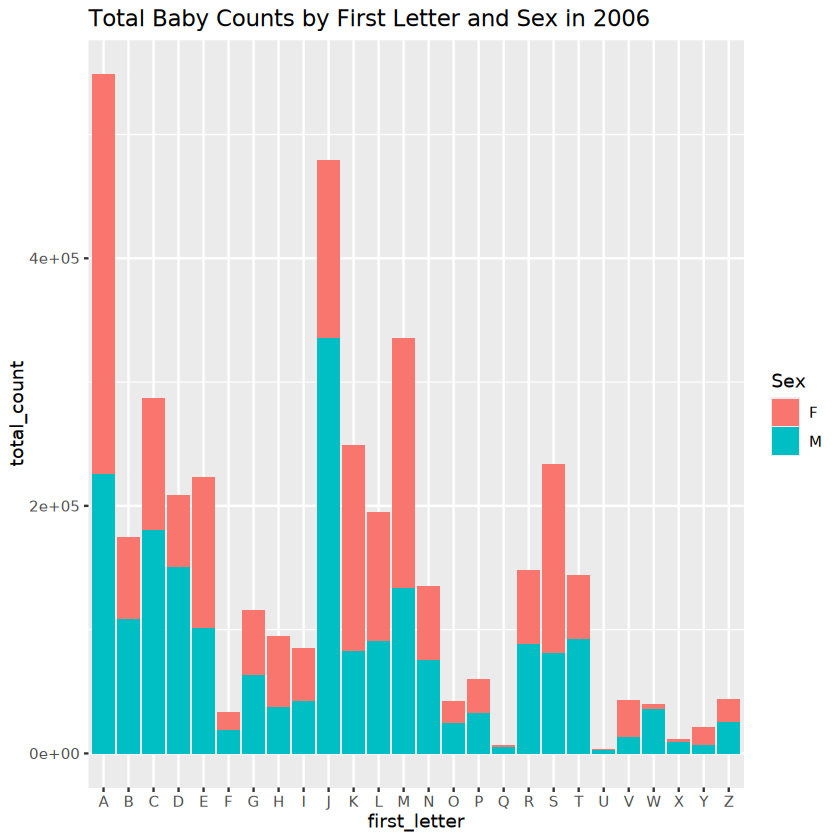

In [ ]:
first_letter_sex <- baby2006 %>%
  mutate(first_letter = substr(Name, 1, 1)) %>%
  group_by(first_letter, Sex) %>%
  summarise(total_count = sum(Counts), .groups = 'drop')

ggplot(first_letter_sex, aes(x = first_letter, y = total_count, fill = Sex)) +
  geom_col() +
  ggtitle("Total Baby Counts by First Letter and Sex in 2006")

I created a column for each first letter and grouped by both first_letter and Sex to get separate counts for both. Then. I used geom_col(), coloring by sex and adding a title.

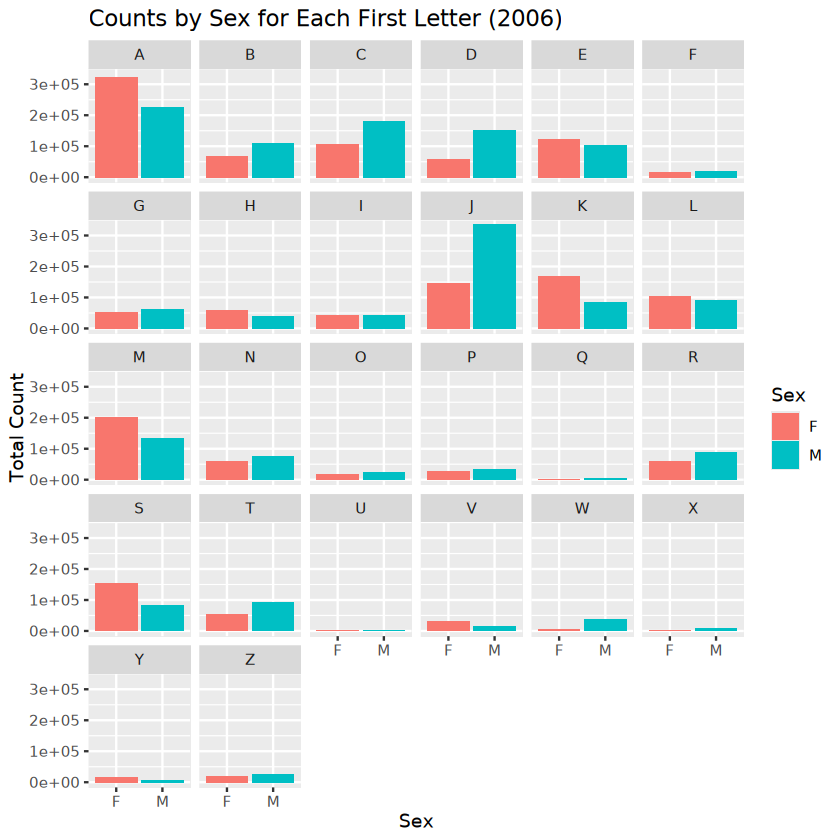

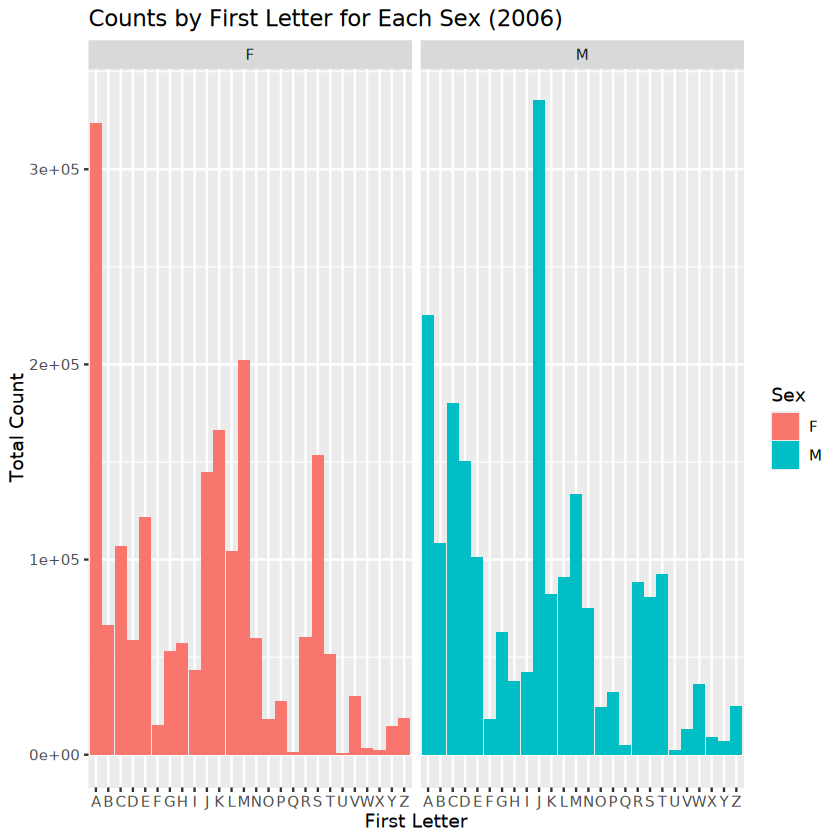

In [ ]:
ggplot(first_letter_sex, aes(x = Sex, y = total_count, fill = Sex)) +
  geom_col() +
  facet_wrap(~ first_letter) +
  labs(
    title = "Counts by Sex for Each First Letter (2006)",
    x = "Sex",
    y = "Total Count"
  )


ggplot(first_letter_sex, aes(x = first_letter, y = total_count, fill = Sex)) +
  geom_col() +
  facet_wrap(~ Sex) +
  labs(
    title = "Counts by First Letter for Each Sex (2006)",
    x = "First Letter",
    y = "Total Count"
  )

facet_wrap() was used to split the barplots into smaller plots. First, I faceted by first_letter, allowing me to compare M vs F for every letter. I then faceted by Sex to see panels for both sexes, and compare letters within each sex.

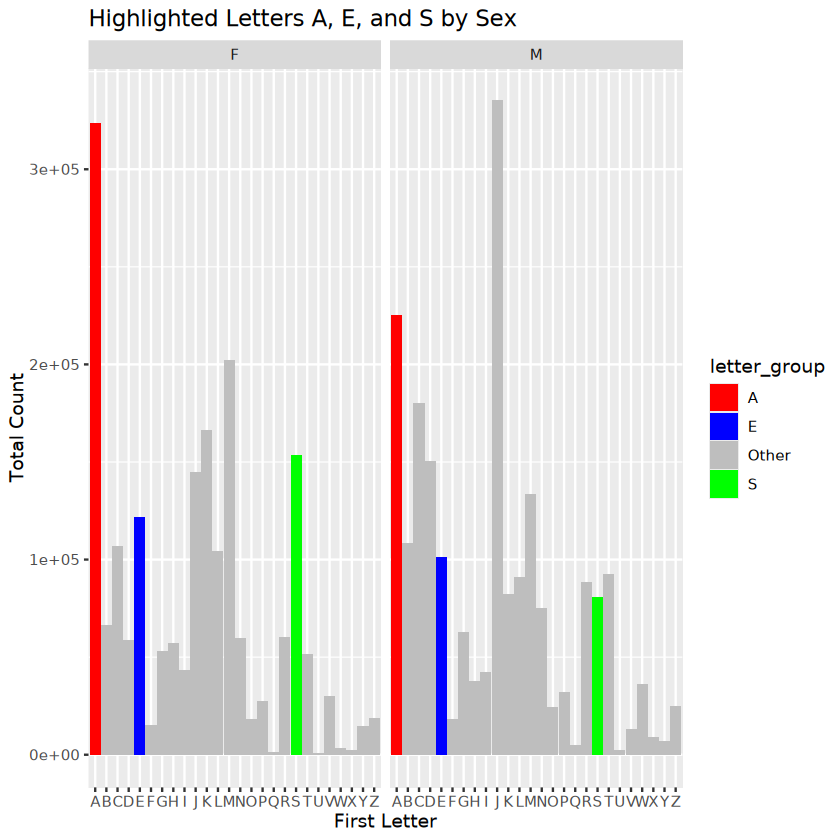

In [ ]:
first_letter_sex <- first_letter_sex %>%
  mutate(letter_group = ifelse(first_letter %in% c("A","E","S"), first_letter, "Other"))

ggplot(first_letter_sex, aes(x = first_letter, y = total_count, fill = letter_group)) +
  geom_col() +
  facet_wrap(~ Sex) +
  scale_fill_manual(values = c(
    "A" = "red",
    "E" = "blue",
    "S" = "green",
    "Other" = "grey"
  )) +
  labs(
    title = "Highlighted Letters A, E, and S by Sex",
    x = "First Letter",
    y = "Total Count"
  )

I created a column to mark letters A, E, and S and labeled all other letters as “Other.” I used scale_fill_manual() to assign colors to A, E, and S, leaving the rest as gray.

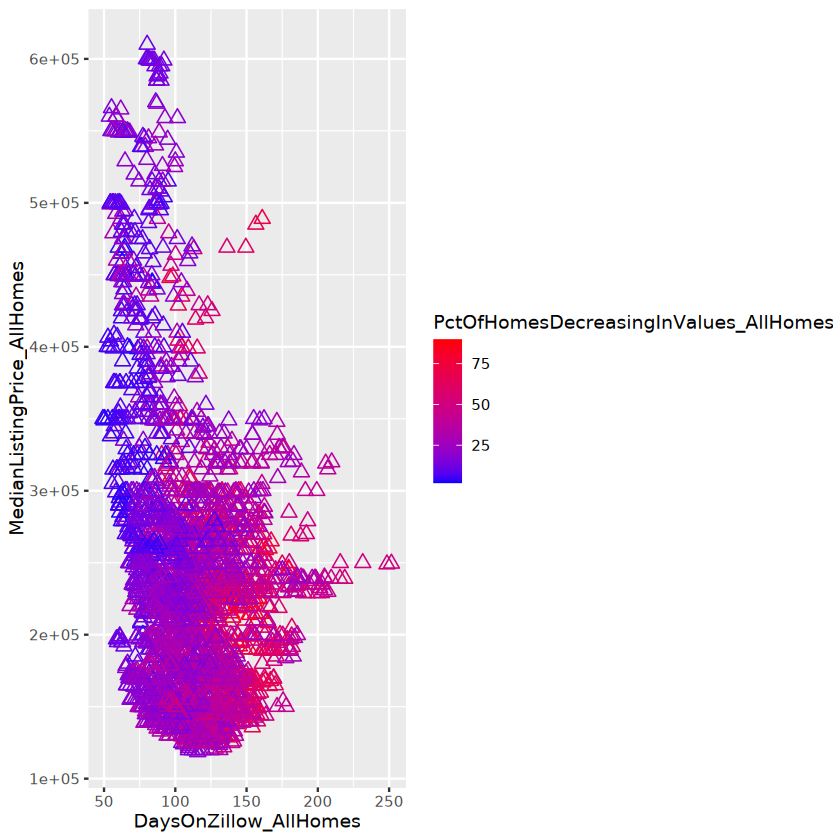

In [ ]:
zillow <- read.csv("/anvil/projects/tdm/data/zillow/State_time_series.csv")

zillow_cleaned <- zillow %>%
  filter(!is.na(DaysOnZillow_AllHomes),
         !is.na(MedianListingPrice_AllHomes),
         !is.na(PctOfHomesDecreasingInValues_AllHomes),
         !is.na(PctOfHomesIncreasingInValues_AllHomes))

p1_clean <- ggplot(zillow_cleaned, aes(x = DaysOnZillow_AllHomes,
                                       y = MedianListingPrice_AllHomes,
                                       color = PctOfHomesDecreasingInValues_AllHomes)) +
  geom_point(size = 3, shape = 2) +
  scale_color_gradient(low = "blue", high = "red")

print(p1_clean)

Missing data leads to gray points because ggplot2 can't assign a position or color to NA values. To solve this, I removed missing value rows using filter() so that everything displays properly.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


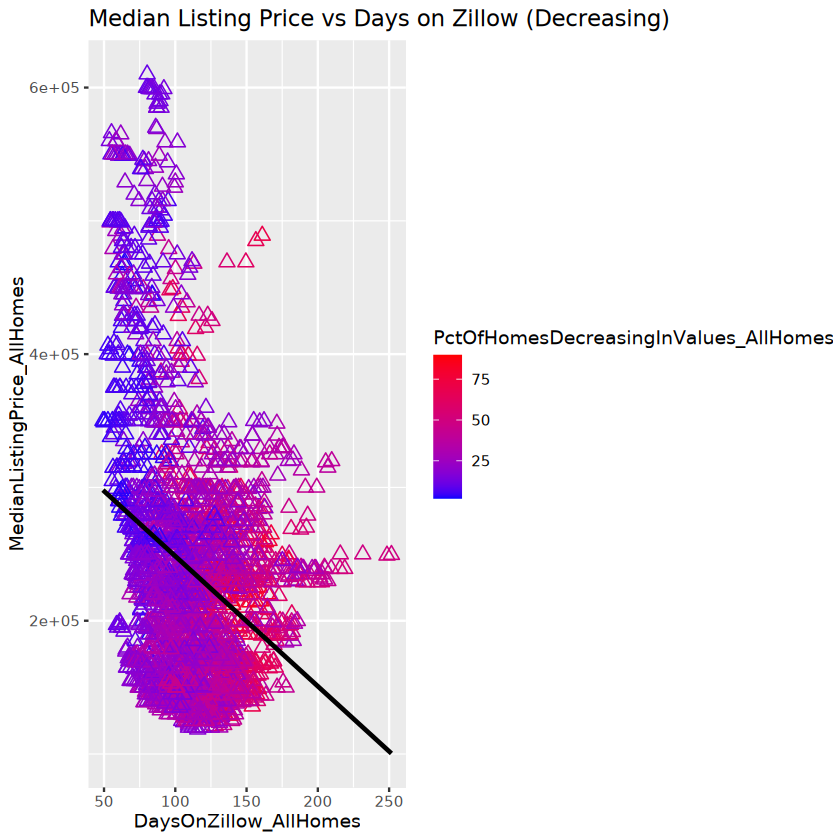

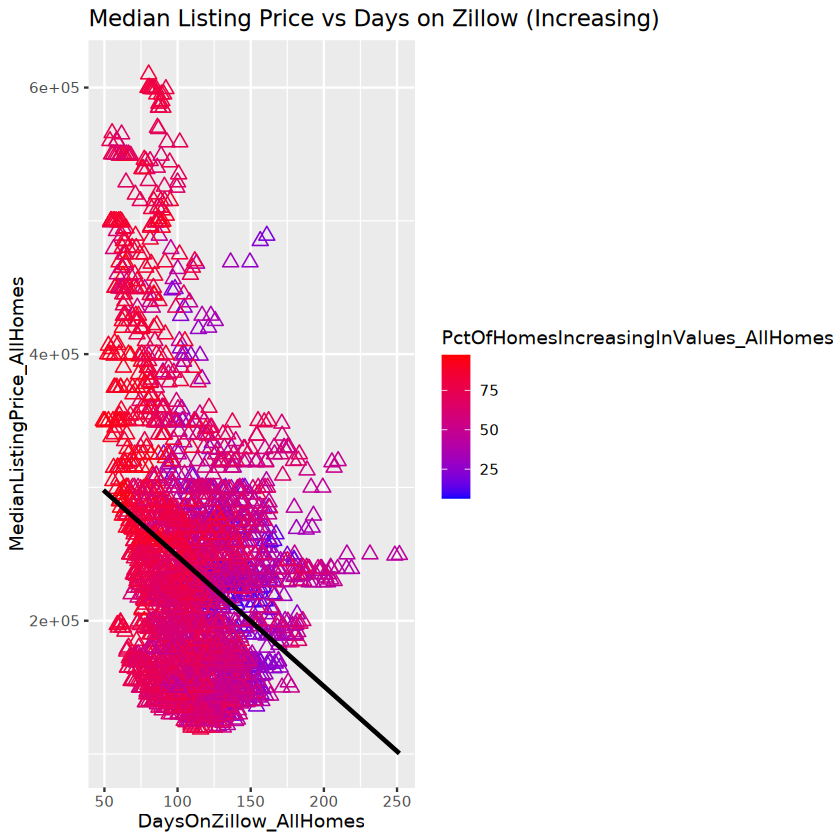

In [ ]:
p1 <- ggplot(zillow_cleaned, aes(x = DaysOnZillow_AllHomes,
                                 y = MedianListingPrice_AllHomes,
                                 color = PctOfHomesDecreasingInValues_AllHomes)) +
  geom_point(size = 3, shape = 2) +
  scale_color_gradient(low = "blue", high = "red") +
  geom_smooth(method = "lm", se = FALSE, color = "black") +
  ggtitle("Median Listing Price vs Days on Zillow (Decreasing)")

print(p1)

p2 <- ggplot(zillow_cleaned, aes(x = DaysOnZillow_AllHomes,
                                 y = MedianListingPrice_AllHomes,
                                 color = PctOfHomesIncreasingInValues_AllHomes)) +
  geom_point(size = 3, shape = 2) +
  scale_color_gradient(low = "blue", high = "red") +
  geom_smooth(method = "lm", se = FALSE, color = "black") +
  ggtitle("Median Listing Price vs Days on Zillow (Increasing)")

print(p2)

I mapped DaysOnZillow_AllHomes to the x-axis and MedianListingPrice_AllHomes to the y-axis. I used PctOfHomesDecreasingInValues_AllHomes as the gradient color. I added a linear trendline using geom_smooth(method = "lm") to show the relationship between listing price and time on Zillow.

The scatterplot shows that as the # of days on Zillow increases, the  listing price slightly decreases as indicated by the downward sloped trendline. There was a large cluster at lower days on Zillow with a wide range of prices. There were some outliers with very high days or prices.

In [ ]:
selected_regions <- c("Indiana", "Tennessee", "Utah", "NewHampshire")

zillow_grouped_small <- zillow_cleaned %>%
  filter(RegionName %in% selected_regions) %>%
  filter(!is.na(MedianListingPrice_AllHomes)) %>%  # remove NA values
  group_by(Date, RegionName) %>%
  summarise(avg_price = mean(MedianListingPrice_AllHomes), .groups = "drop")

head(zillow_grouped_small)

Date,RegionName,avg_price
<chr>,<chr>,<dbl>
2010-01-31,NewHampshire,249000
2010-02-28,NewHampshire,239999
2010-03-31,NewHampshire,239900
2010-04-30,NewHampshire,239900
2010-05-31,NewHampshire,245000
2010-06-30,NewHampshire,244900


I filtered to only include selected regions and removed any missing value rows. Then, I grouped by Date and RegionName to calculate the average price/date/region.

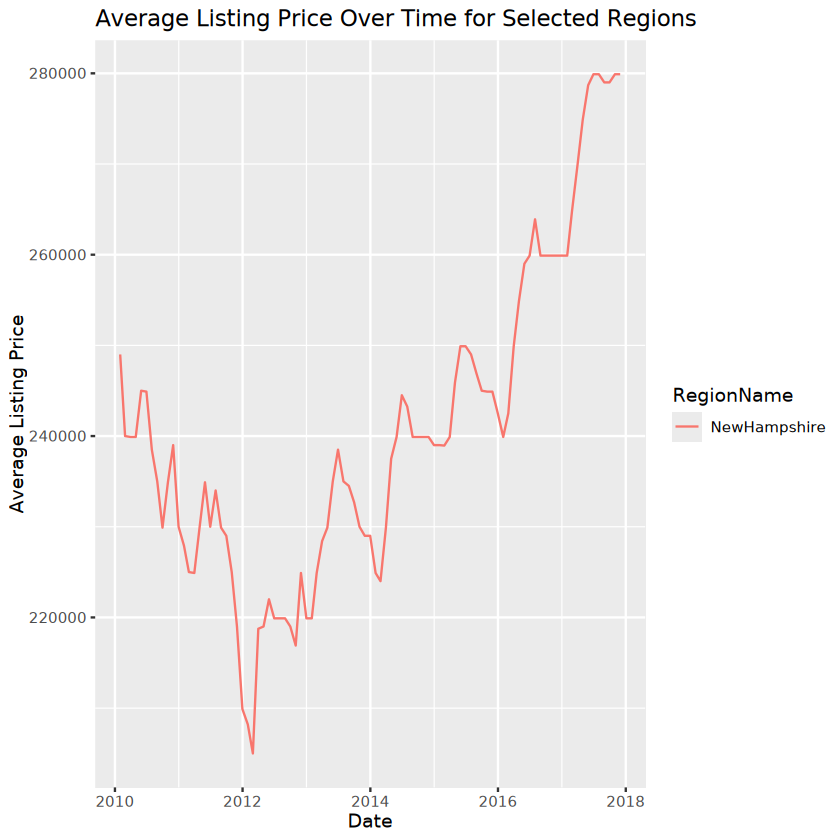

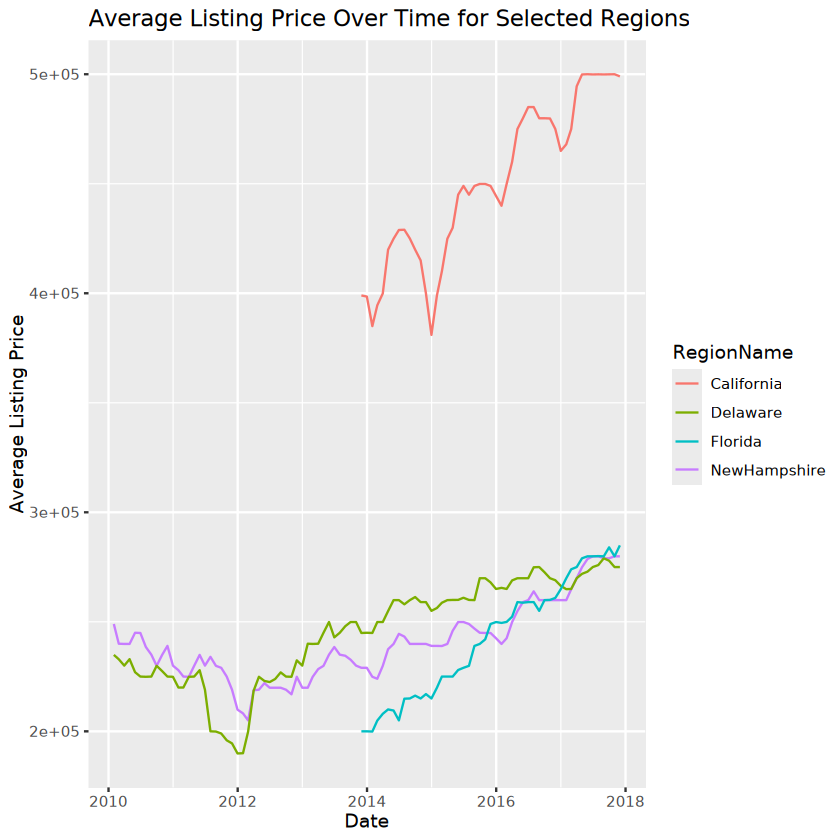

In [ ]:
p <- ggplot(zillow_grouped_small, aes(x = Date, y = avg_price, color = RegionName, group = RegionName)) +
  geom_line() +
  labs(title = "Average Listing Price Over Time for Selected Regions",
       x = "Date",
       y = "Average Listing Price")

print(p)

more_selected_regions <- c("California", "Delaware", "Florida", "Alaska")

zillow_grouped_more <- zillow_cleaned %>%
  filter(RegionName %in% more_selected_regions) %>%
  group_by(Date, RegionName) %>%
  summarise(avg_price = mean(MedianListingPrice_AllHomes), .groups = "drop")

p <- p + geom_line(data = zillow_grouped_more, aes(x = Date, y = avg_price, color = RegionName, group = RegionName))

print(p)

I created a line plot using geom_line() to show average listing prices changing over time. First, I plotted the selected regions, then added lines for additional regions. I colored the lines by RegionName, and grouped each to ensure each line is connected correctly across dates.

The line plot shows how median listing prices vary over time for different states. California has the highest average prices, while Delaware remains lower on average. Overall, each region shows an increasing trend that indicates rising home prices.